##**PCA to Detect Credit Card Fraud**

This project offers an alternative approach to credit card fraud detection, using PCA-based anomaly detection rather than supervised learning. It identifies fraudulent transactions by analyzing patterns and detecting anomalies in the data.


In [1]:
#Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Import the dataset
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [10]:
#Seperate samples by class
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [11]:
 #Drop "Time" and "Class" columns
 legit=legit.drop(['Time','Class'],axis=1)
 fraud=fraud.drop(['Time','Class'],axis=1)

### Reduce the dataset from 29 to 26 dimensions and use a threshold of 200 to differentiate legitimate transactions from fraudulent transactions.

In [12]:
#Use PCA to reduce the two datasets from 29 to 26 dimensions, and then invert the transform to restore each dataset to 29 dimensions.
pca = PCA(n_components=26, random_state=0)

legit_pca = pd.DataFrame(pca.fit_transform(legit), index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud), index=fraud.index)

legit_restored = pd.DataFrame(pca.inverse_transform(legit_pca), index=legit_pca.index)
fraud_restored = pd.DataFrame(pca.inverse_transform(fraud_pca), index=fraud_pca.index)

In [13]:
#The next step is to compute the loss

def get_anomaly_scores(df_original, df_restored):
  loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
  loss = pd.Series(data=loss, index=df_original.index)
  return loss

legit_scores = get_anomaly_scores(legit, legit_restored)
fraud_scores = get_anomaly_scores(fraud, fraud_restored)


<Axes: >

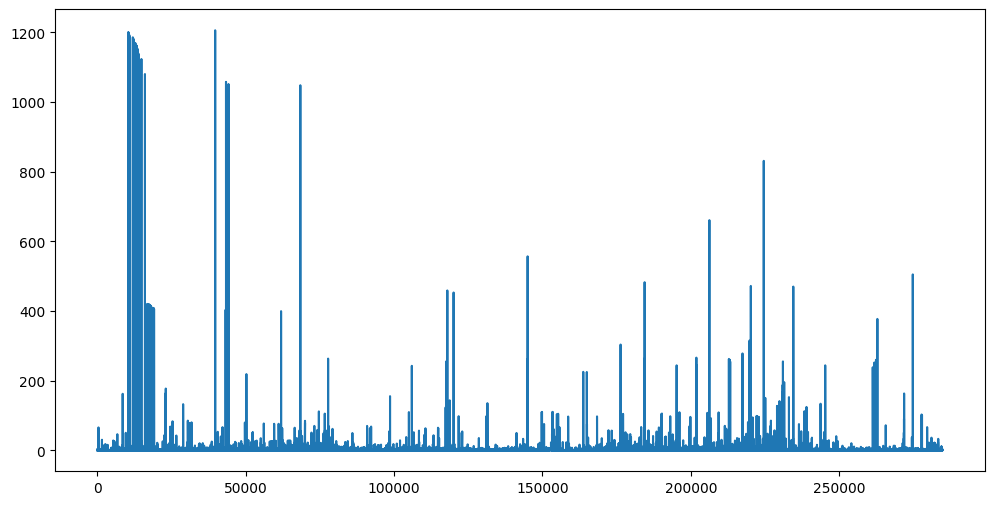

In [14]:
#Now plot the losses incurred when the legitimate transactions were transformed and restored:

legit_scores.plot(figsize = (12, 6))

<Axes: >

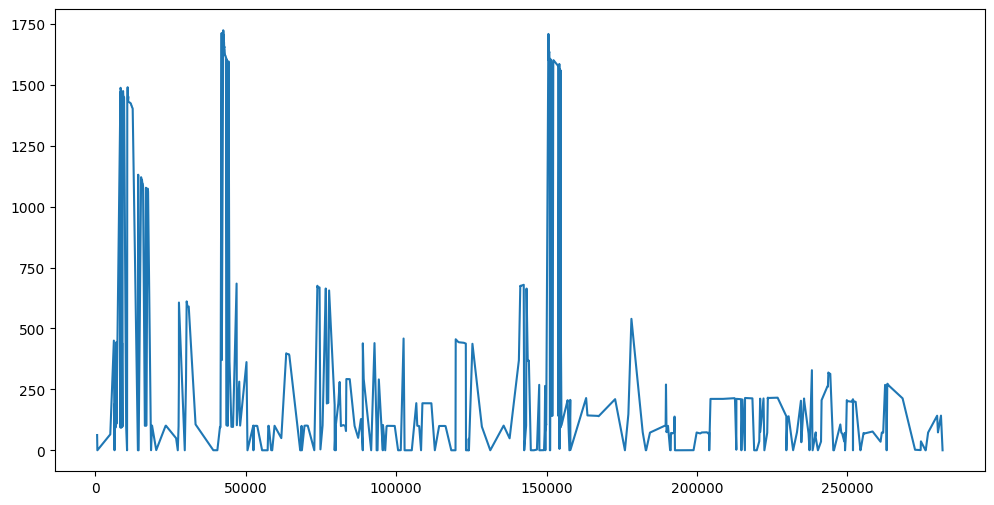

In [16]:
#Next plot the losses incurred when the fraudulant transactions were transformed and restored:

fraud_scores.plot(figsize = (12, 6))

Text(113.9222222222222, 0.5, 'True label')

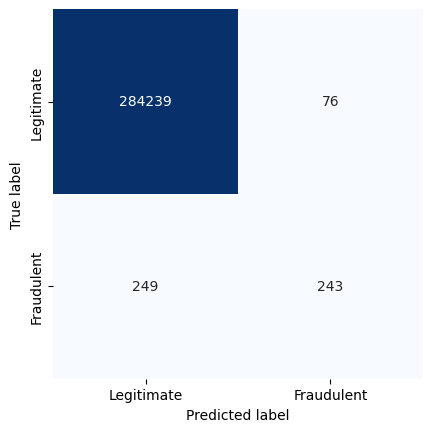

In [17]:


threshold = 200
true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()
labels = ['Legitimate', 'Fraudulent']
mat = [[true_neg, false_pos], [false_neg, true_pos]]
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

### Reduce the dataset from 29 to 20 dimensions and use a threshold of 200 to differentiate legitimate transactions from fraudulent transactions.

In [18]:
#Use PCA to reduce the two datasets from 29 to 20 dimensions, and then invert the transform to restore each dataset to 29 dimensions.
pca = PCA(n_components=20, random_state=0)

legit_pca = pd.DataFrame(pca.fit_transform(legit), index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud), index=fraud.index)

legit_restored = pd.DataFrame(pca.inverse_transform(legit_pca), index=legit_pca.index)
fraud_restored = pd.DataFrame(pca.inverse_transform(fraud_pca), index=fraud_pca.index)

In [19]:
#The next step is to compute the loss

def get_anomaly_scores(df_original, df_restored):
  loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
  loss = pd.Series(data=loss, index=df_original.index)
  return loss

legit_scores = get_anomaly_scores(legit, legit_restored)
fraud_scores = get_anomaly_scores(fraud, fraud_restored)


<Axes: >

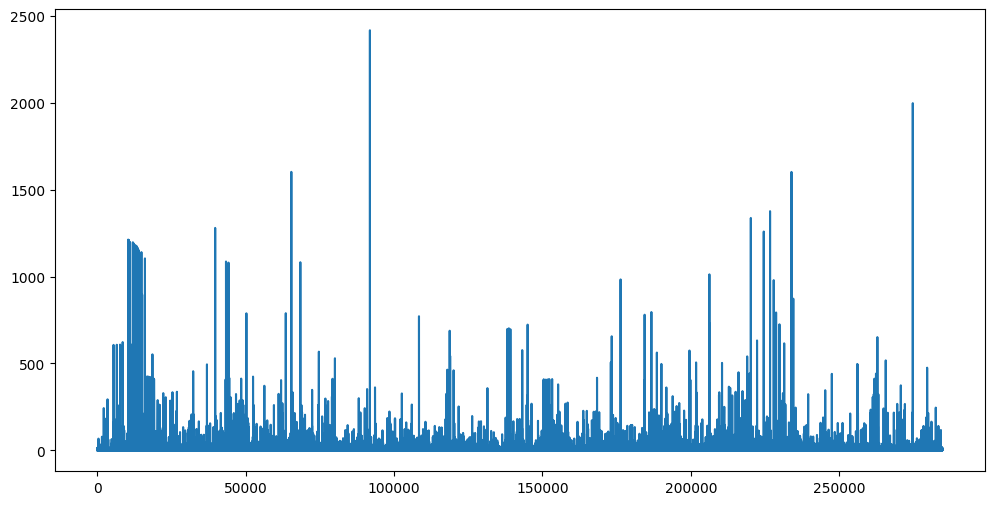

In [20]:
#Now plot the losses incurred when the legitimate transactions were transformed and restored:

legit_scores.plot(figsize = (12, 6))

<Axes: >

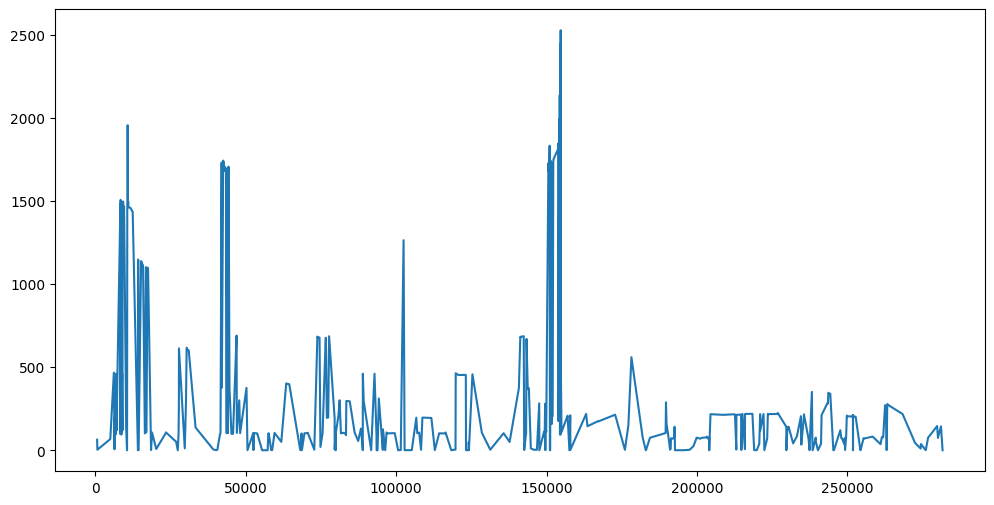

In [21]:
#Next plot the losses incurred when the fraudulant transactions were transformed and restored:

fraud_scores.plot(figsize = (12, 6))

Text(113.9222222222222, 0.5, 'True label')

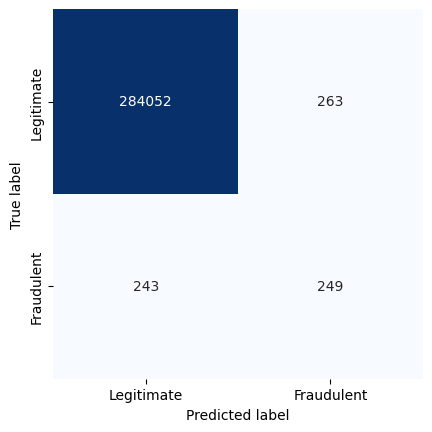

In [24]:


threshold = 200
true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()
labels = ['Legitimate', 'Fraudulent']
mat = [[true_neg, false_pos], [false_neg, true_pos]]
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

This method classifies transactions based on the observed distribution of a "loss" metric identified in the plots: most legitimate transactions have a loss < 200, while many fraudulent transactions have a loss ≥ 200. The classification rule is straightforward: transactions with a loss < 200 are classified as legitimate, and those with a loss ≥ 200 are classified as fraudulent. A confusion matrix is then used to evaluate the classification performance by visualizing True Positives, True Negatives, False Positives, and False Negatives. This approach combines insights from data visualizations with a simple threshold-based rule to detect fraudulent transactions effectively.

The error rate in this model is influenced by two key parameters: the number of dimensions the dataset is reduced to (26) and the threshold set to distinguish between legitimate and fraudulent transactions (200). You can adjust the accuracy by experimenting with different values. After conducting some informal testing, I found that this combination worked reasonably well. Lowering the threshold improves the model's ability to identify fraudulent transactions, but it may result in more legitimate transactions being misclassified. Ultimately, the choice of error rate depends on your tolerance for mistakes, bearing in mind that rejecting a legitimate credit card purchase could upset a customer.